In [ ]:
from fastai.text import *
from pathlib import Path        

In [ ]:
import pandas as pd
data_frame = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Judgements/judgement.csv',header='infer')
ui = (data_frame.iloc[91,0]) 
type(ui)  

str

breaking the tring in peices of 5k

In [ ]:
no_of_tokens = []
j_no = []
for u in range(len(data_frame)):
  c = len(data_frame['judgement'][u].split(' '))
  if c>=5000:
    no_of_tokens.append(c)
    j_no.append(u)

dictnry = {}
for q in j_no:
  tag = data_frame['class'][q]
  i = (data_frame['judgement'][q].split(' '))
  table = []
  for v in range(1,268108):
    table_element = 5000*v
    table.append(table_element)
    if (len(i)-table_element)<=5000:
      table.append(len(i))
      break
  table
  listy = (table[:len(table)-1])
  listy.insert(0,0) 
  for x,y in zip(listy,table[:]):
    string = ' '.join(i[x:y])
    # strings.append(string)
    # tags.append(tag)
    dictnry['judgement'] = string
    dictnry['class'] = tag
    data_frame = data_frame.append(dictnry,ignore_index=True)
for z in j_no:
  data_frame = data_frame.drop(z)
# for t in [1663,1808,1824,1825]:
#   data_frame = data_frame.drop(t)

data_frame = data_frame.reset_index(drop=True)
data_frame

,judgement,class
0,"Uday U. Lalit, J.\nLeave granted.\nThis appeal...",CIVIL
1,"A.K. SIKRI, J.\nBy our judgment dated January ...",CIVIL
2,"KURIAN, J.:\nLeave granted.\nAppellant is aggr...",CRIMINAL
3,"V. GOPALA GOWDA, J.\nLeave granted.\nThis crim...",CRIMINAL
4,"J U D G M E N T KURIAN, J.:\nThe facts unfold ...",CIVIL
...,...,...
4769,The appeal is allowed.\n...................J.\...,CIVIL
4770,"M.R. SHAH, J.\n\n1. The issue arises for consi...",CIVIL
4771,"of the category who, if the admission would ha...",CIVIL
4772,"A.S. Bopanna,J.\nLeave granted.\n2. These appe...",CIVIL


In [ ]:
data_frame.to_csv('/content/drive/My Drive/Colab Notebooks/Judgements/judgement5k.csv',index=False)   

These 2 code cells are for finding the big text and removing it.

In [ ]:
# data_frame.iloc[2860:]     
# data_frame = data_frame.drop(2861) 
# data_frame = data_frame.reset_index(drop=True)
# data_frame[2861:]         

,judgement,class
2860,"303.\n(b) As regards the State Legislatures, a...",CIVIL
2861,"one State over another, or making or authorizi...",CIVIL
2862,or in respect of the property which is made th...,CIVIL
2863,"majority, Justice Gajendragadkar held as under...",CIVIL
2864,ordinarily be grounded in protectionism and wi...,CIVIL
...,...,...
4762,The appeal is allowed.\n...................J.\...,CIVIL
4763,"M.R. SHAH, J.\n\n1. The issue arises for consi...",CIVIL
4764,"of the category who, if the admission would ha...",CIVIL
4765,"A.S. Bopanna,J.\nLeave granted.\n2. These appe...",CIVIL


In [ ]:
import pandas as pd
data_frame = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Judgements/judgement.csv')
u1 = []
for u in range(len(data_frame)):
  c = (data_frame['judgement'][u].split(' '))
  for q in c:
    if q == 'JINDAL':
      u1.append(u)
#   try:
#     c[0]
#   except Exception:
#     continue
#   if c[0]=='jindal':   
#     u1.append(u)
u1

[91]

In [ ]:
path  = Path("/content/drive/My Drive/Colab Notebooks/Judgements/")   
data_bunch = TextLMDataBunch.from_csv(path,"judgement.csv",valid_pct=0.2,
                 text_cols=0,label_cols=1,
                 chunksize = 10000, max_vocab=60000, min_freq=2, 
                 include_bos=True, include_eos=True,bs=128,bptt=30)                                  

In [ ]:
for x,y in iter(data_bunch.train_dl):
  print(x.size())
print((" ").join(data_bunch.vocab.itos[o] for o in x[0]))
torch.cuda.device_count() ## counting the number of gpu's 

) 3 xxup scc 199 : 2004 xxup scc ( xxmaj cri ) 699 ] , xxup scc p. 210 , para 18 ) “ 18 . … xxmaj it would be appropriate to construe the expression ‘ husband ’ to cover a person who enters into marital relationship and under the colour of such proclaimed or feigned status of husband subjects the woman concerned to cruelty or coerces her


In [ ]:
learner = language_model_learner(data_bunch,AWD_LSTM, pretrained=URLs.WT103_BWD, drop_mult=0.5)        

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


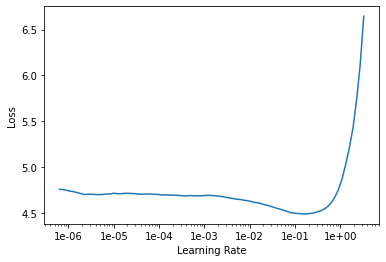

In [ ]:
learner.lr_find()
learner.recorder.plot()                

In [ ]:
learner.fit_one_cycle(2,1e-02)                         

epoch,train_loss,valid_loss,accuracy,time
0,3.371925,3.498457,0.379976,22:37
1,3.342159,3.307318,0.398771,22:46


In [ ]:
learner.predict("has been",n_words=10)                                                                                  

'has been xxbos Dipak Misra , CJI . this'

In [ ]:
learner.save_encoder('fine_enc')                 

In [ ]:
path  = Path("/content/drive/My Drive/Colab Notebooks/Judgements/")   
data_clas = TextClasDataBunch.from_csv(path,"judgement5k.csv",valid_pct=0.2, 
                 text_cols=0, label_cols=1,
                 chunksize = 5000, max_vocab=60000, min_freq=2, 
                 include_bos=True, include_eos=True,bs=16)                                                                                            

In [ ]:
classifier = text_classifier_learner(data_clas, arch= AWD_LSTM,drop_mult=0.5,max_len=60000)
classifier.load_encoder('fine_enc')                

RNNLearner(data=TextClasDataBunch;

Train: LabelList (3813 items)
x: TextList
xxbos xxmaj prafulla xxup c. xxmaj pant , xxup j. 
  xxmaj this appeal is directed against judgment and order dated 02.04.2014 , passed by the xxmaj high xxmaj court of xxmaj punjab and xxmaj haryana in xxmaj criminal xxmaj appeal xxmaj no . xxup xxunk xxup db of 2002 whereby said xxmaj court has dismissed the appeal affirming the conviction and sentence under xxmaj section 302 / 34 xxup ipc , against accused / appellants xxmaj pawan @ xxmaj rajinder xxmaj singh and xxmaj ajit @ xxmaj dara xxmaj singh , recorded by the xxmaj additional xxmaj sessions xxmaj judge , xxmaj fast xxmaj track xxmaj court xxmaj no . 1 , xxmaj faridabad . xxmaj the xxmaj high xxmaj court has further affirmed the conviction and sentence recorded against accused / appellant xxmaj ajit @ xxmaj dara xxmaj singh under xxmaj section 25 of the xxmaj arms xxmaj act , 1959 . 
  xxmaj heard learned counsel for the parties and perused the recor

In [ ]:
# import pickle
# pickle.dump(classifier,open(path/'class.pk1','wb'))
# classifier.lr_find()
# classifier.recorder.plot()       
# classifier.save_encoder('fine_enc_class')   

In [ ]:
classifier.fit_one_cycle(6,1e-03)                                        

epoch,train_loss,valid_loss,accuracy,time
0,0.882102,0.702731,0.800839,30:26
1,0.548934,0.434286,0.844864,28:07
2,0.440273,0.430360,0.801887,28:01
3,0.378587,0.384850,0.834382,29:15
4,0.338595,0.325731,0.878407,28:51
5,0.361650,0.349544,0.855346,30:54


In [ ]:
classifier.freeze_to(-2)
classifier.fit_one_cycle(2,1e-03,moms=(0.8,0.7))